# Okt module from konlpy.tag 

- Okt.pos()
- Okt.nouns()
- Okt.morphs()

In [58]:
import platform
import matplotlib.pyplot as plt

from konlpy.tag import Okt #, Kkma, Komoran
from collections import Counter


def mkWordcloud(most_comm_list, img_file_name):
	"""Make WordCloud
	Args:
		most_comm_list: Counter().most_common()	
	"""
	import matplotlib.pyplot as plt
	from wordcloud import WordCloud

	if platform.system() == 'Windows':
		path = r'C:\Windows\Fonts\malgun.ttf'
	elif platform.system() == 'Darwin':
		path = r'/System/Library/Fonts/AppleGothic'
	else:
		path = r'usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

	wc = WordCloud(font_path=path)
	wc = wc.generate_from_frequencies(dict(most_comm_list))
	wc.to_file(f'{img_file_name}.png')

	plt.figure(figsize=(5, 5))
	plt.axis('off')
	plt.imshow(wc);

In [34]:
# text = 'Open Korean Text'
text = '한글 문장 예제입니다. 조사가 있습니다.'

okt = Okt()
print(text)

print('\n' + 'stem=True')
print(okt.pos(text, norm=True, stem=True))

print('\n' + 'stem=False')
print(okt.pos(text))

print('\n' + '명사만 리턴')
print(okt.nouns(text))

print('\n' + '형태소 단위로 나눔')
print(okt.morphs(text))

print('\n' + '어절 추출')
print(okt.phrases(text))

한글 문장 예제입니다. 조사가 있습니다.

stem=True
[('한글', 'Noun'), ('문장', 'Noun'), ('예제', 'Noun'), ('이다', 'Adjective'), ('.', 'Punctuation'), ('조사', 'Noun'), ('가', 'Josa'), ('있다', 'Adjective'), ('.', 'Punctuation')]

stem=False
[('한글', 'Noun'), ('문장', 'Noun'), ('예제', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation'), ('조사', 'Noun'), ('가', 'Josa'), ('있습니다', 'Adjective'), ('.', 'Punctuation')]

명사만 리턴
['한글', '문장', '예제', '조사']

형태소 단위로 나눔
['한글', '문장', '예제', '입니다', '.', '조사', '가', '있습니다', '.']

어절 추출
['한글', '한글 문장', '한글 문장 예제', '조사', '문장', '예제']


In [49]:
# tag가 명사 또는 동사인 단어만 noun_adj_lst에 추가
text = '나랏말이 중국과 달라 한자와 서로 통하지 아니하므로,	\
		우매한 백성들이 말하고 싶은 것이 있어도 마침내 제 뜻을 잘 표현하지 못하는 사람이 많다.\
		내 이를 딱하게 여기어 새로 스물여덟 자를 만들었으니,	\
		사람들로 하여금 쉬 익히어 날마다 쓰는 데 편하게 할 뿐이다.'

noun_adj_lst = set()
noun_adj_lst2 = []
for word, tag in okt.pos(text):
	if tag in ['Noun', 'Adjective']:
		noun_adj_lst.add(word)
		noun_adj_lst2.append(word)
print('\n' + 'set().add')
print(noun_adj_lst)

print('\n' + 'list().append')
print(noun_adj_lst2)


set().add
{'새로', '것', '스물', '달라', '중국', '우매', '있어도', '많다', '사람', '마침내', '편하게', '표현', '나랏말', '말', '내', '뿐', '데', '제', '쉬', '뜻', '여덟', '날', '한자', '통', '아니하므로', '딱하게', '서로', '백성'}

list().append
['나랏말', '중국', '달라', '한자', '서로', '통', '아니하므로', '우매', '백성', '말', '것', '있어도', '마침내', '제', '뜻', '표현', '사람', '많다', '내', '딱하게', '새로', '스물', '여덟', '사람', '쉬', '날', '데', '편하게', '뿐']


In [52]:
print('\n' + '각 단어의 개수 세기')
print(Counter(noun_adj_lst))

print('\n' + '가장 많이 나온 단어 3개 저장')
frequency = Counter(noun_adj_lst).most_common(3)
print(frequency)


각 단어의 개수 세기
Counter({'새로': 1, '것': 1, '스물': 1, '달라': 1, '중국': 1, '우매': 1, '있어도': 1, '많다': 1, '사람': 1, '마침내': 1, '편하게': 1, '표현': 1, '나랏말': 1, '말': 1, '내': 1, '뿐': 1, '데': 1, '제': 1, '쉬': 1, '뜻': 1, '여덟': 1, '날': 1, '한자': 1, '통': 1, '아니하므로': 1, '딱하게': 1, '서로': 1, '백성': 1})

가장 많이 나온 단어 3개 저장
[('새로', 1), ('것', 1), ('스물', 1)]


---
## requests 다루기

In [16]:
import bs4
import requests
import json


session = requests.Session()
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5)'\
		   'AppleWebKit 537.36 (KHTML, like Gecko) Chrome',\
		   'Accept': 'text/html, application/xhtml+xml, application/xml;'\
		   'q=0.9, image/webp, */*; q=0.8'}

params = {'key': 'value'}
url = 'http://www.tisotry.com'
url2 = 'https://www.tisotry.com'

# response = session.get(url, headers=headers)
# print('\n' + 'https status code is', response.status_code)
# print(response.text)

res = requests.get(url, params=params)
print(res.url)

res2 = requests.get(url2, params=params)
print(res2.url)

# 조금 더 복잡한 구조로 POST 요청을 해야 할 때
# data = {'param1': 'value1', 'param2': 'value2'}
# res = requests.post(url, data=data)

data = {'outer': {'inner': 'value'}}
res = requests.post(url, data=json.dumps(data))
print(res)

# 헤더 및 쿠키 추가 예시
headers = {'Content-Type': 'application/json; charset=utf-8'}
cookies = {'session_id': 'dgkim5360.tistory.com/entry/phton-requests'}  # 임의로 적은 session_id 예시
res = requests.get(url, headers=headers, cookies=cookies)

http://www.tisotry.com/?key=value
https://www.tisotry.com/?key=value
<Response [200]>


---
## WordCloud on Naver news title

In [44]:
import re
import time

from bs4 import BeautifulSoup


start_num = 1
end_num = 0
search_kwrd = '빅데이터'

# while True:
	# if start_num > end_num: break
url = f'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={search_kwrd}&start={start_num}'
req = requests.get(url)
time.sleep(1)

title_lst = []
if req.ok:
	bs = BeautifulSoup(req.text, 'html.parser')
	list_news = bs.find('ul', {'class': 'list_news'})
	li_list = list_news.find_all('li', {'id': re.compile('sp_nws.*')})
	# li_bxs = list_news.find_all('li', {'class': 'bx'})
	for li in li_list:
		news = li.find('a', {'class': 'news_tit'})
		title_lst.append(news['title'])
# start_num += 10
print(title_lst)

['핀다, 빅데이터 상권분석 스타트업 오픈업 인수', '빅데이터 분석해 보이스피싱 막고 불합리한 법령 정비', 'AGL 빅데이터 리포트 “한국 골퍼 평균 50.3세”', '한국철도 휴가철 부정승차 단속 강화…빅데이터 등 활용', '신한카드, 말레이시아 정부에 빅데이터 노하우 전수', '신한카드, 기재부 주관 해외 빅데이터 정책 공유사업 참여', '[바이오헬스 육성] 바이오 전문가 1만7000명 양성·100만명 목표 빅데이터 구축', '尹 AI·디지털 의료 평가기간 단축...의료 빅데이터 법제화 주문', '아기화장품 브랜드평판 2022년 7월 빅데이터 분석결과', "빨라지는 '조기퇴사'에 시름…AI·빅데이터가 '인사관리'"]


In [56]:
okt = Okt()

nva = []
for title in title_lst:
	word_tag = okt.pos(title)
	for word, tag in word_tag:
		if tag in ['Noun', 'Verb', 'Adjective']:
			nva.append(word)
print(nva)
print()

print(Counter(nva))
print()

frequency = Counter(nva).most_common(10)
print(frequency)

['핀다', '빅데이터', '상권', '분석', '스타트업', '오픈', '업', '인수', '빅데이터', '분석', '해', '보이스피싱', '막고', '불합리', '법령', '정비', '빅데이터', '리포트', '한국', '골퍼', '평균', '세', '한국', '철도', '휴가', '철', '부정승차', '단속', '강화', '빅데이터', '등', '활용', '신한카드', '말레이시아', '정부', '빅데이터', '노하우', '전수', '신한카드', '기재부', '주관', '해외', '빅데이터', '정책', '공유', '사업', '참여', '바이오', '헬스', '육성', '바이오', '전문가', '명', '양성', '목표', '빅데이터', '구축', '디지털', '의료', '평가', '기간', '단축', '의료', '빅데이터', '법', '제화', '주문', '아기', '화장품', '브랜드', '평판', '빅데이터', '분석', '결과', '빨라지는', '조기', '퇴사', '시름', '빅데이터', '인사', '관리']

Counter({'빅데이터': 10, '분석': 3, '한국': 2, '신한카드': 2, '바이오': 2, '의료': 2, '핀다': 1, '상권': 1, '스타트업': 1, '오픈': 1, '업': 1, '인수': 1, '해': 1, '보이스피싱': 1, '막고': 1, '불합리': 1, '법령': 1, '정비': 1, '리포트': 1, '골퍼': 1, '평균': 1, '세': 1, '철도': 1, '휴가': 1, '철': 1, '부정승차': 1, '단속': 1, '강화': 1, '등': 1, '활용': 1, '말레이시아': 1, '정부': 1, '노하우': 1, '전수': 1, '기재부': 1, '주관': 1, '해외': 1, '정책': 1, '공유': 1, '사업': 1, '참여': 1, '헬스': 1, '육성': 1, '전문가': 1, '명': 1, '양성': 1, '목표': 1, '구축': 1, '디지털': 1, '평가': 1

TypeError: imsave() missing 1 required positional argument: 'arr'

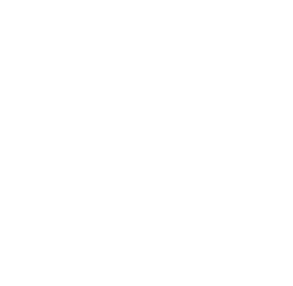

In [59]:
mkWordcloud(frequency)